# Iris Flower Classification

Predicting the species of Iris flowers using machine learning.

# 1)Load & Explore Dataset:

In [1]:
import pandas as pd
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.shape

(150, 6)

In [3]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# 2)Data Visualization:

Class Distribution (how many samples of each Iris species)

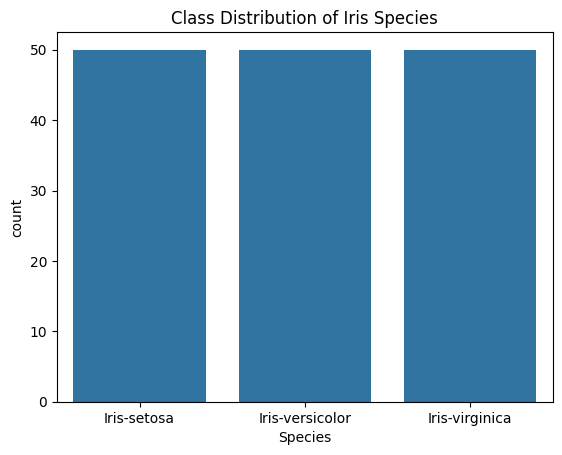

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Species',data=df)
plt.title("Class Distribution of Iris Species")
plt.show()

Histograms of features

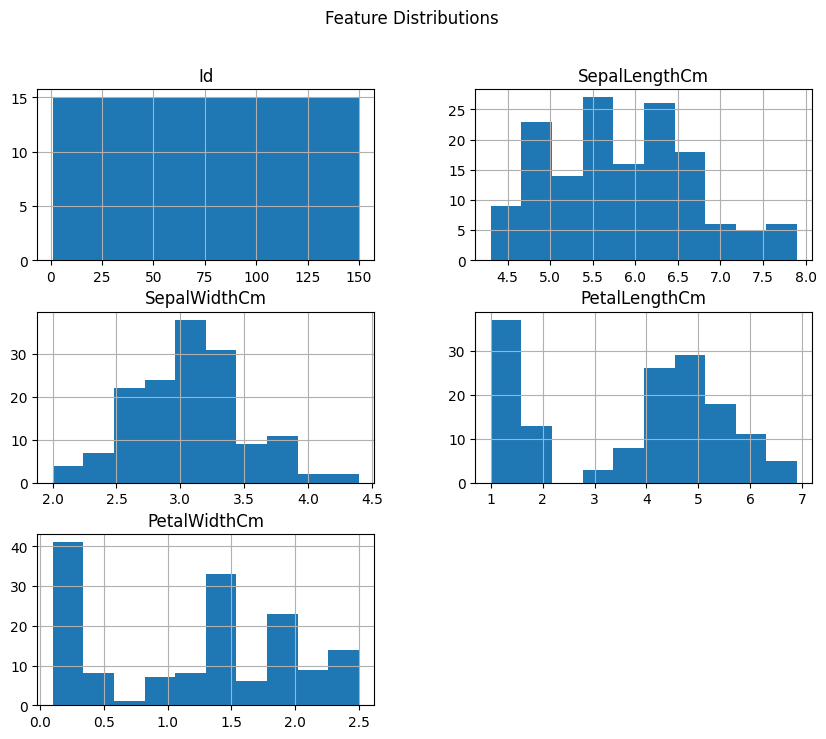

In [7]:
df.hist(figsize=(10,8))
plt.suptitle("Feature Distributions")
plt.show()

Pairplot(Scatterplots for all the features, to see how they separate the classes)

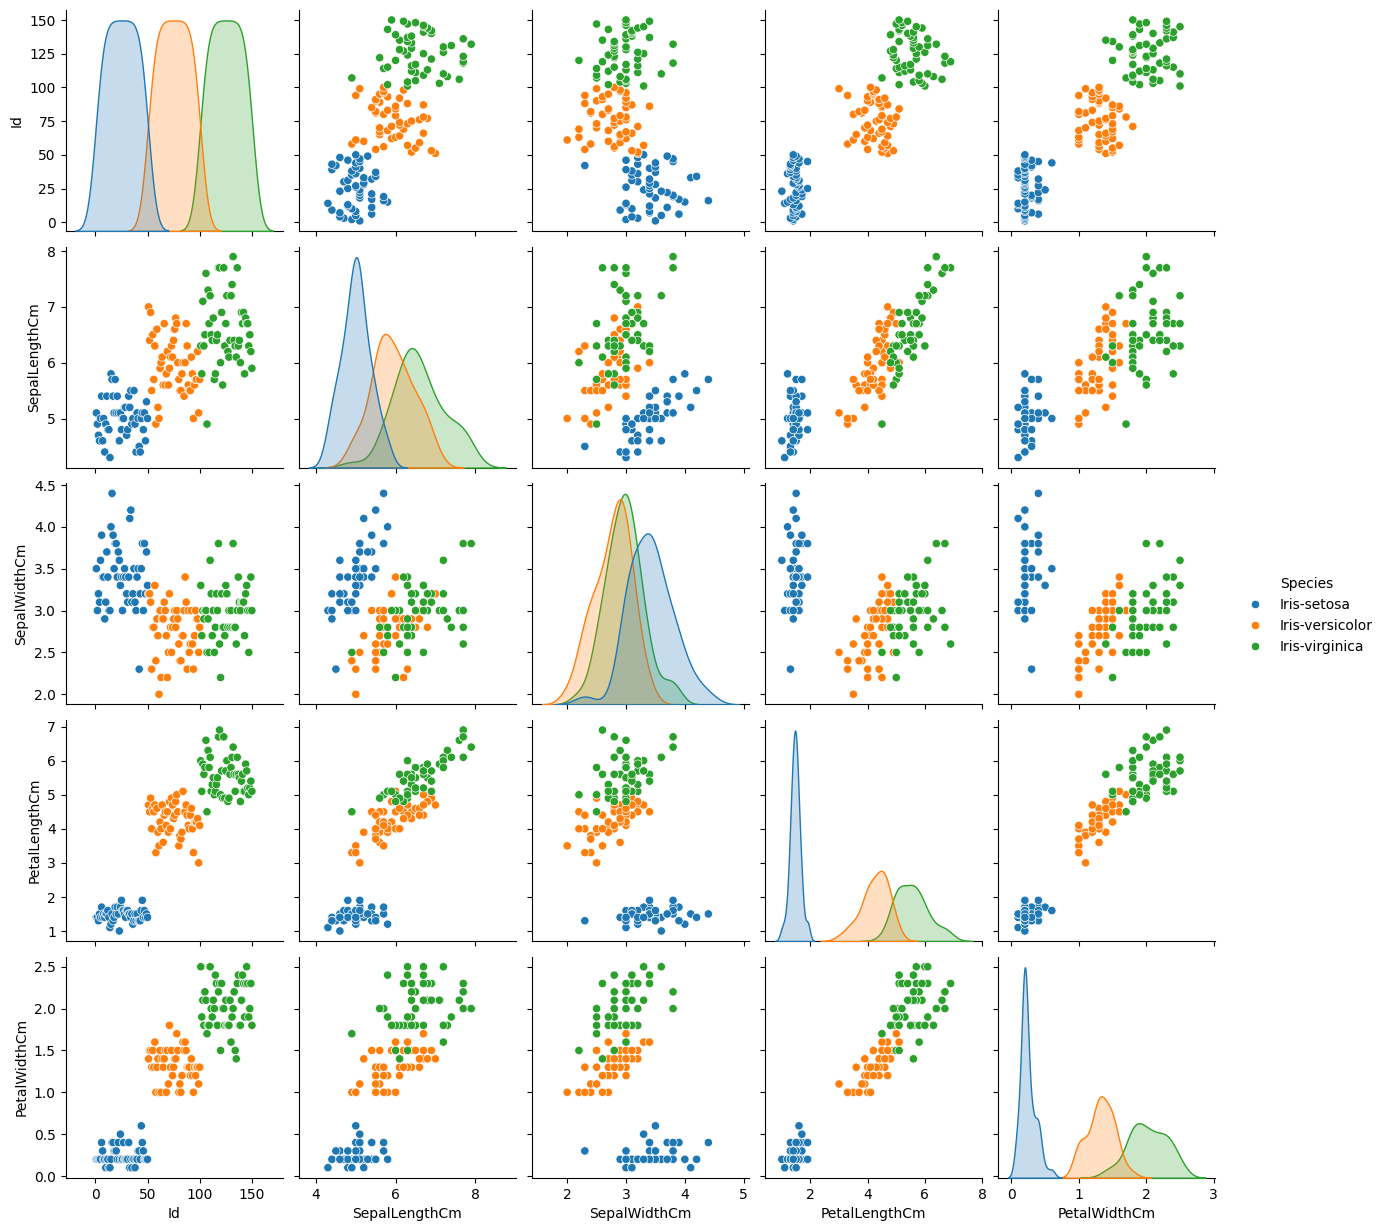

In [8]:
sns.pairplot(df, hue="Species", diag_kind="kde")
plt.show()

Correlation Heatmap

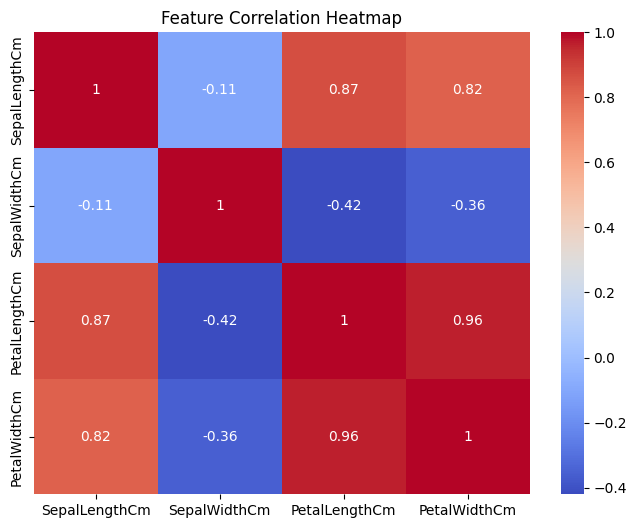

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(columns=["Id", "Species"]).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# 3)Data Preprocessing & Model Training:

Encode the species into numbers 

In [10]:
from sklearn.preprocessing import LabelEncoder
df=df.drop(columns=["Id"],errors="ignore")
le=LabelEncoder()
y=le.fit_transform(df["Species"])
x=df.drop(columns=["Species"])
label_map=dict(zip(le.classes_,le.transform(le.classes_)))
label_map

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

Train-test split(with stratify)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)
x_train.shape, x_test.shape

((120, 4), (30, 4))

Train a simple baseline model (Logistic Regression)

In [12]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(max_iter=200, n_jobs=None)
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=200)

Accuracy Score

In [13]:
from sklearn.metrics import accuracy_score
y_pred=logreg.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.9666666666666667


Classification Report

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=le.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



Confusion Matrix

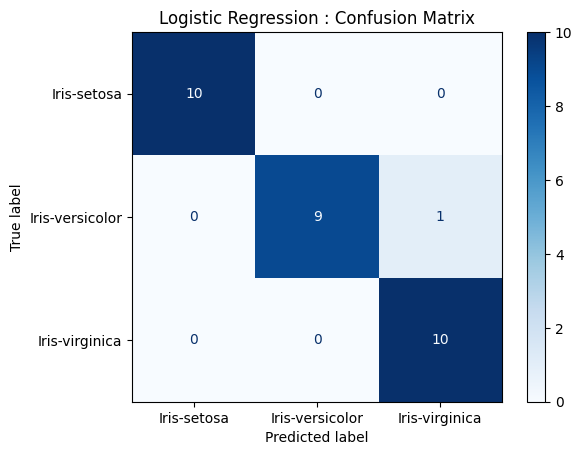

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp=ConfusionMatrixDisplay.from_estimator(logreg,x_test,y_test,display_labels=le.classes_,cmap="Blues")
plt.title("Logistic Regression : Confusion Matrix")
plt.show()

# 4)Training Multiple Models:

K-Nearest Neighbors (KNN)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [21]:
from sklearn.metrics import accuracy_score, classification_report
y_pred_knn = knn.predict(x_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



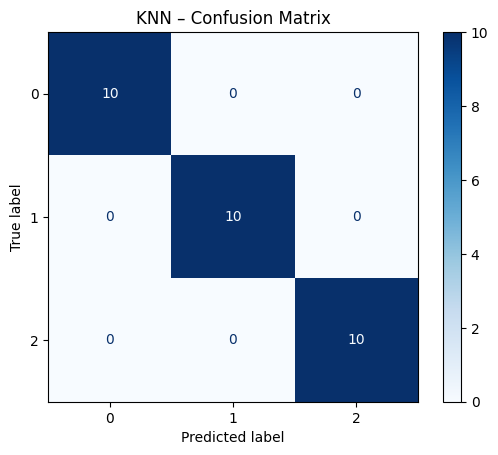

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, cmap="Blues")
plt.title("KNN – Confusion Matrix")
plt.show()

Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
from sklearn.metrics import accuracy_score, classification_report
y_pred_dt = dt.predict(x_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



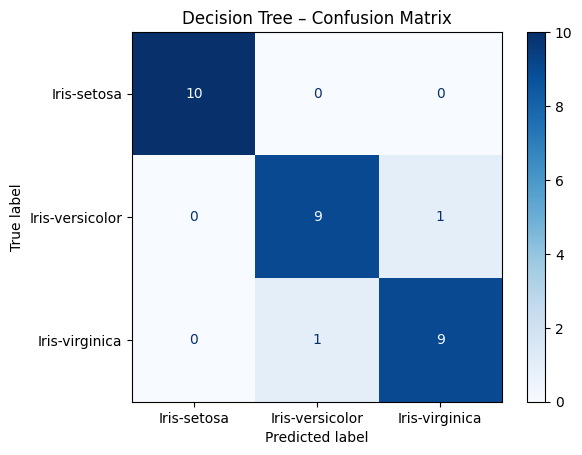

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=le.classes_)
disp_dt.plot(cmap="Blues")
plt.title("Decision Tree – Confusion Matrix")
plt.show()

Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
from sklearn.metrics import accuracy_score, classification_report
y_pred_rf = rf.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=le.classes_))

Random Forest Accuracy: 0.9

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



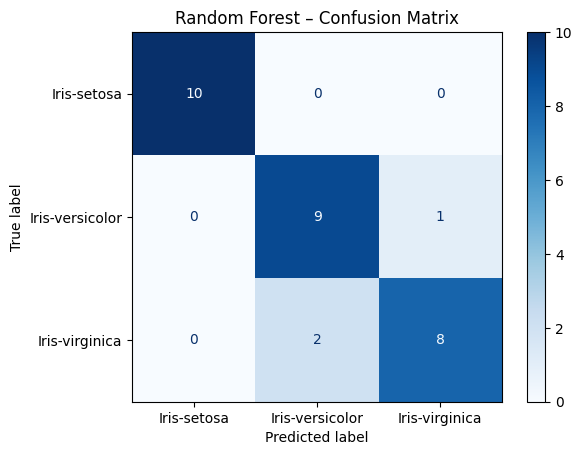

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=le.classes_)
disp_rf.plot(cmap="Blues")
plt.title("Random Forest – Confusion Matrix")
plt.show()